In [96]:
#importing important modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from collections import OrderedDict 
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from IPython.display import Video

In [97]:
# opening the browser by giving the path of chromeDriver
driver = webdriver.Chrome()

# opening instagram Login Page
driver.get('https://www.instagram.com/accounts/login/')

# initisalize explicit wait
wait = WebDriverWait(driver,20)

In [98]:
userName='karanjot0201'
Password = 'Nil'

In [99]:
#Login_To_Insta() function is same as part-I. All the functionality is same as before. It is used to Login Instagram Handle
def Login_To_Insta(userName,Password):
    try:
        # Locating Username TextBox then enter username
        wait.until(EC.presence_of_element_located((By.NAME,"username"))).send_keys(userName)

        # Locating Password TextBox then enter password
        wait.until(EC.presence_of_element_located((By.NAME,"password"))).send_keys(Password)

        # Locating Login Button then submit it
        wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/div/div/div[1]/div[2]/form/div/div[3]"))).submit()
        
        # Locating Save your Login Info ? then click on Not now
        wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/section/main/div/div/div/div/div"))).click()
        
        # Locating Turn on Notification : then click on No
        wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[3]/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]"))).click()

    except TimeoutException:
        print("Something Went Wrong!")
        


In [100]:
# Login to Instagram
Login_To_Insta(userName,Password)

In [101]:
"""
In the above cell I have already logged in so now I have found out top 10 handles with their profile links which
will help me later to visit these user_handles after putting food in the search bar. Now I have all the profile links and we
can simply visit.
In this function I have passed search word 'food' and number of handle that I want to get that is 10 user handle. This Function
is returning a dictionary having user handle and their corresponding user links.
"""

def Search(string,n):
    User_Handle={}
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]'))).click()
    search_input = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input')))
    search_input.clear()
    search_input.send_keys(string)
    userId = wait.until(EC.presence_of_all_elements_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a')))

    base_url ="https://instagram.com"

    # store user handle with their handle link
    count=0
    for i in userId:
        
        if count>=n:
            break
        html_content=i.get_attribute('outerHTML')
        User_Link = BeautifulSoup(html_content,'html.parser').a['href']
        Get_User_Handle = User_Link.split('/')[1]
        if Get_User_Handle!='explore':
            User_Handle[Get_User_Handle]=base_url+User_Link
            count+=1
    
            
    return User_Handle

# store top 10 user handle with their user links
Store_user_IDs = Search('food',10)

In [102]:
Store_user_IDs

{'food_dot_com_cloudkitchen': 'https://instagram.com/food_dot_com_cloudkitchen/',
 'foodtalkindia': 'https://instagram.com/foodtalkindia/',
 'foodi_epaaji': 'https://instagram.com/foodi_epaaji/',
 'foodpharmer': 'https://instagram.com/foodpharmer/',
 'foodiee_ishh': 'https://instagram.com/foodiee_ishh/',
 'dilsefoodie': 'https://instagram.com/dilsefoodie/',
 'food': 'https://instagram.com/food/',
 'foodies.on.hunt': 'https://instagram.com/foodies.on.hunt/',
 'food_gasmic_famous': 'https://instagram.com/food_gasmic_famous/',
 'foodpicasso': 'https://instagram.com/foodpicasso/'}

In [103]:
# Open the first 30 handles and find the top 5 which have the highest number of followers

# Open the first 30 handles and find the top 5 which have the highest number of followers

"""
I have created a function named Count_Followers which takes user Id link as argument and return number of followers of that user
Firstly I got all the user's followers count and then I found the top 5 user which have highest followers among 10 user
I got the user id and their link from above created dictionary , after that I found the Top 5 user ID with their followers 
which I print below.

As of now it is showing me that foodinsider have highest followers but this can be change depending upon the user and the time 
when you will run the code.

"""

def Count_Followers(user_Handle_link):
    driver.get(user_Handle_link)
    sleep(2)
    data = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
    Follower_count = BeautifulSoup(data.get_attribute('outerHTML'),'html.parser').span['title']
    Follower_count=int(Follower_count.replace(',',''))
    return Follower_count
    
# get followers count of 10 user and store that in dictionary
Followers_of_user = {}
for user_Id,Link in Store_user_IDs.items():
    follower = Count_Followers(Link)
    Followers_of_user[user_Id]=follower
    
# print the top 5 user having highest followers and also store the user id for futher calculation
Top_5_handle=[]
Top_5_followed_user={}
for i in sorted(Followers_of_user.items(), key=lambda kv: kv[1],reverse=True)[:5]:
    print(i[0],'--->',i[1],'Followers')
    Top_5_followed_user[i[0]]=i[1]
    Top_5_handle.append(i[0])

foodpharmer ---> 2509820 Followers
dilsefoodie ---> 1249640 Followers
foodtalkindia ---> 308532 Followers
food ---> 182542 Followers
foodiee_ishh ---> 20216 Followers


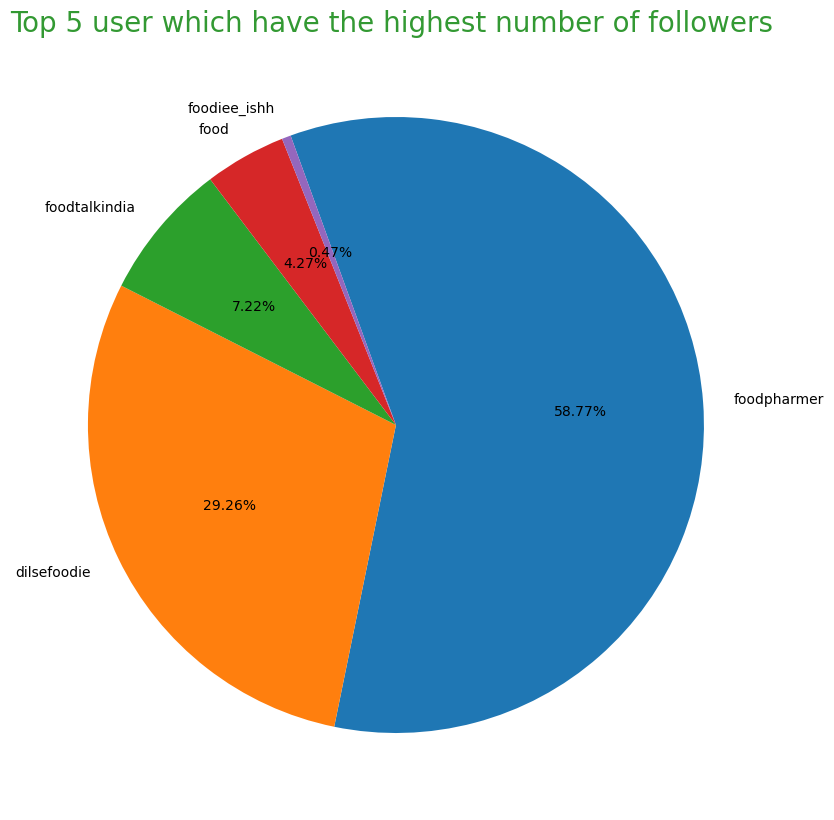

In [104]:
# Depict this information using a suitable graph.
# Pie Graph just to get the idea which user_handle has more followers.

count = list(Top_5_followed_user.values())
userId = list(Top_5_followed_user.keys())

plt.figure(figsize=(10,10))
plt.pie(count,labels=userId,autopct="%.2f%%",counterclock=False,startangle=110)
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='green',alpha=0.8)
plt.show()

2. Now Find the number of posts these handles have done in the previous 3 days.

In [114]:
'''To solve this problem I have made a function named Number_of_Post which takes two arguments: profile link and number of days from 
which I want to know the total number of post that user posted.
In this function first click on the First post then get the time and convert it into requied fomate then calculate the difference
between current datetime and post datetime if it is less then given number of days it will continue the count of post 
and go to the next post otherwise function will stop and return number of post that the user posted.

here I used the user id and its link which I found in previous answer

As of now it is showing me that healthyfood.addiction have highest posted in 20 days but this can be change depending upon
the user and the time when you will run the code.
'''


def Number_of_Post(user_url,No_of_Days):
        
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[2]/div/div[2]/section/main/div/div[2]/div/div[1]/div[1]/a/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        time_of_post = wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, "time")))[-1].get_attribute('datetime')
                                                                            
        date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
        if (datetime.now() - date_of_post).days > No_of_Days :
            break
        else :
            no_of_post += 1

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    return no_of_post


# getting the number of posts these handles have done in the previous 3 days and store them in dictionary
no_of_post_per_user = {}
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    Post_count = Number_of_Post(user_url,3)
    no_of_post_per_user[Id] = Post_count
    
# print the user id and number of post have done by user in 3 days
for ID,Count in no_of_post_per_user.items():
    print(ID,'----->',Count,'Posts')

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=125.0.6422.78)
Stacktrace:
0   chromedriver                        0x000000010066e510 chromedriver + 4302096
1   chromedriver                        0x0000000100666e58 chromedriver + 4271704
2   chromedriver                        0x0000000100298000 chromedriver + 278528
3   chromedriver                        0x00000001002db398 chromedriver + 553880
4   chromedriver                        0x00000001002d0e24 chromedriver + 511524
5   chromedriver                        0x00000001002d085c chromedriver + 510044
6   chromedriver                        0x0000000100312c5c chromedriver + 781404
7   chromedriver                        0x00000001002cf004 chromedriver + 503812
8   chromedriver                        0x00000001002cf9ec chromedriver + 506348
9   chromedriver                        0x0000000100636558 chromedriver + 4072792
10  chromedriver                        0x000000010063b004 chromedriver + 4091908
11  chromedriver                        0x000000010061d79c chromedriver + 3970972
12  chromedriver                        0x000000010063b8ec chromedriver + 4094188
13  chromedriver                        0x000000010061071c chromedriver + 3917596
14  chromedriver                        0x0000000100658b50 chromedriver + 4213584
15  chromedriver                        0x0000000100658ccc chromedriver + 4213964
16  chromedriver                        0x0000000100666a50 chromedriver + 4270672
17  libsystem_pthread.dylib             0x00000001aa5ae06c _pthread_start + 148
18  libsystem_pthread.dylib             0x00000001aa5a8e2c thread_start + 8


# 3. Depict this information using a suitable graph.

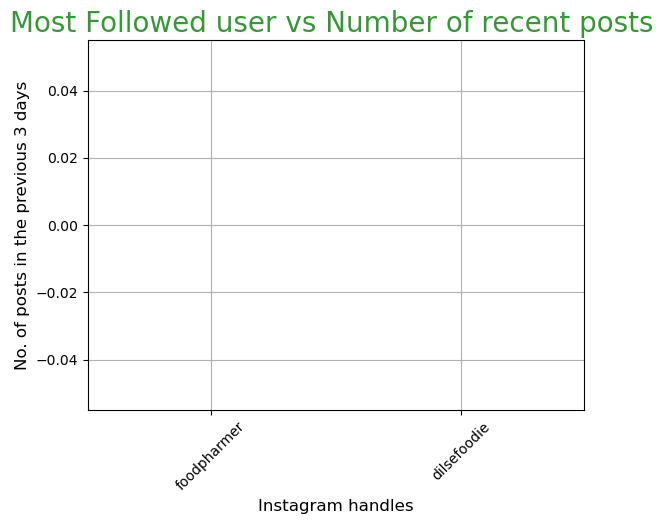

In [115]:
x = no_of_post_per_user.keys()
y = no_of_post_per_user.values()

plt.bar(x,y,color='g',alpha=0.7)
plt.ylabel("No. of posts in the previous 3 days",size=12)
plt.xlabel("Instagram handles",size=12)
plt.xticks(rotation = 45)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Problem 2 :
Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [109]:
"""To answer this question I have made a function named content_of_post it takes two arguments:
1. profile link
2. no. of post
This function is suitable for extracting the content of n number of posts and this function will return a list of 
text extracted from each post.

In this function firstly I click on the first post extract all the content and move to the next post. 
In this, my friend wants the list of Hashtags so I extract only hashtags rather than all the words, 
there is no means to extract all the words.

And I collect all the text for 10 posts corresponding to their user and store them in a dictionary key as user id and values as a list of words.

"""




def content_of_post(user_url,No_of_post):
        
    Text_list = []
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[2]/div/div[2]/section/main/div/div[2]/div/div[1]/div[1]/a/div[1]')))
    First_Post.click()
    no_of_post=0
    z = ""
    y = 7
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.XPATH,f'/html/body/div[{y}]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div[1]/li/div/div/div[2]/div[1]')))
        Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
        
        # get the text
        for text in Texts:
            text=text.text
            if text[0]!='@':
                Text_list.append(text)
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,f'/html/body/div[{y}]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div{z}/button')))
        
        Next_post.click()
        sleep(2)
        z = '[2]'
        y = 6

    driver.back()
    return Text_list

# extract all the list of text of top 5 user which I get in previous qes and store them in list for further requirments
words_of_5_user = []
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    text_list = content_of_post(user_url,10)
    words_of_5_user.extend(text_list)
    print(Id,'--->',text_list)
    print()

foodpharmer ---> ['#labelpadhegaindia', '#LabelPadhegaIndia', '#LabelPadhegaIndia', '#labelpadhegaindia', '#labelpadhegaindia']

dilsefoodie ---> ['#dilsefoodie', '#food', '#afeemhandi', '#omelette', '#streetfood', '#dilsefoodie', '#food', '#streetfood', '#cholekulche', '#harghartiranga', '#75For75', '#amritmohatsav', '#DilSeDesi', '#dilsefoodie', '#dilsefoodie', '#food', '#maggi', '#streetfood', '#dilsefoodie', '#food', '#butterchicken', '#rollingnaan', '#butternaan', '#northindian', '#dilsefoodie', '#food', '#dhaba', '#matarpaneer', '#streetfood', '#dilsefoodie', '#food', '#mutton', '#raan', '#kolhapuri', '#mumbai', '#dilsefoodie', '#food', '#noida', '#juulscafe', '#lounge', '#foodfood', '#italian', '#indian', '#chinese', '#dilsefoodie', '#food', '#dilsecouple', '#bangalore', '#karnatakafood', '#dilsefoodie', '#food', '#bhindi', '#masala', '#recipe', '#homechef', '#foodfood', '#vegetarian']



ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=125.0.6422.78)
Stacktrace:
0   chromedriver                        0x000000010066e510 chromedriver + 4302096
1   chromedriver                        0x0000000100666e58 chromedriver + 4271704
2   chromedriver                        0x0000000100298000 chromedriver + 278528
3   chromedriver                        0x00000001002db398 chromedriver + 553880
4   chromedriver                        0x00000001002d0e24 chromedriver + 511524
5   chromedriver                        0x00000001002d085c chromedriver + 510044
6   chromedriver                        0x0000000100312c5c chromedriver + 781404
7   chromedriver                        0x00000001002cf004 chromedriver + 503812
8   chromedriver                        0x00000001002cf9ec chromedriver + 506348
9   chromedriver                        0x0000000100636558 chromedriver + 4072792
10  chromedriver                        0x000000010063b004 chromedriver + 4091908
11  chromedriver                        0x000000010061d79c chromedriver + 3970972
12  chromedriver                        0x000000010063b8ec chromedriver + 4094188
13  chromedriver                        0x000000010061071c chromedriver + 3917596
14  chromedriver                        0x0000000100658b50 chromedriver + 4213584
15  chromedriver                        0x0000000100658ccc chromedriver + 4213964
16  chromedriver                        0x0000000100666a50 chromedriver + 4270672
17  libsystem_pthread.dylib             0x00000001aa5ae06c _pthread_start + 148
18  libsystem_pthread.dylib             0x00000001aa5a8e2c thread_start + 8


# 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [110]:
"""
Here I made a function to get the frequency of each word, In this function, it takes only one argument 
1. List of words, returns dictionary having word and corresponding frequencies
I calculate the frequency of each word and store them for further requirements I got the list of words from
previous question.

"""

def get_word_frequency(List_of_words):
    dct = {}
    words_list = []
    for word in List_of_words:
        dct[word] = dct.get(word,0) + 1
    return dct

# calling the function
word_freq_dict = get_word_frequency(words_of_5_user)
word_freq_dict

{'#labelpadhegaindia': 3,
 '#LabelPadhegaIndia': 2,
 '#dilsefoodie': 10,
 '#food': 9,
 '#afeemhandi': 1,
 '#omelette': 1,
 '#streetfood': 4,
 '#cholekulche': 1,
 '#harghartiranga': 1,
 '#75For75': 1,
 '#amritmohatsav': 1,
 '#DilSeDesi': 1,
 '#maggi': 1,
 '#butterchicken': 1,
 '#rollingnaan': 1,
 '#butternaan': 1,
 '#northindian': 1,
 '#dhaba': 1,
 '#matarpaneer': 1,
 '#mutton': 1,
 '#raan': 1,
 '#kolhapuri': 1,
 '#mumbai': 1,
 '#noida': 1,
 '#juulscafe': 1,
 '#lounge': 1,
 '#foodfood': 2,
 '#italian': 1,
 '#indian': 1,
 '#chinese': 1,
 '#dilsecouple': 1,
 '#bangalore': 1,
 '#karnatakafood': 1,
 '#bhindi': 1,
 '#masala': 1,
 '#recipe': 1,
 '#homechef': 1,
 '#vegetarian': 1}

# 3.Create a csv file with two columns : the word and its frequency

In [111]:
words = [ key for key,value in word_freq_dict.items()]
word_frequency = [ value for key,value in word_freq_dict.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Create the pandas dataframe 
df = pd.DataFrame(columns)

#using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)

# Printing the Top 10 Row of the table
df.head(10)

,Word,Frequency
0,#labelpadhegaindia,3
1,#LabelPadhegaIndia,2
2,#dilsefoodie,10
3,#food,9
4,#afeemhandi,1
5,#omelette,1
6,#streetfood,4
7,#cholekulche,1
8,#harghartiranga,1
9,#75For75,1


# 4. Now, find the hashtags that were most popular among these bloggers

In [112]:
"""
To answer this question I have made a function that sorts the given dictionary by values
I call this function by passing the word frequency dictionary and got sorted words by frequency
Through this function I got to know that #foodies and #food is the most popular among the 5 bloggers, this can be changed over time.
"""
def sort_by_value(Dict):
    sorted_data = [[value,key] for key,value in Dict.items()]
    sorted_data.sort(reverse=True)
    return sorted_data

# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = sort_by_value(word_freq_dict)

# top hashtags
for i in hastag_with_frequency:
    print(i[1],'-->',i[0],'Hashtags')

#dilsefoodie --> 10 Hashtags
#food --> 9 Hashtags
#streetfood --> 4 Hashtags
#labelpadhegaindia --> 3 Hashtags
#foodfood --> 2 Hashtags
#LabelPadhegaIndia --> 2 Hashtags
#vegetarian --> 1 Hashtags
#rollingnaan --> 1 Hashtags
#recipe --> 1 Hashtags
#raan --> 1 Hashtags
#omelette --> 1 Hashtags
#northindian --> 1 Hashtags
#noida --> 1 Hashtags
#mutton --> 1 Hashtags
#mumbai --> 1 Hashtags
#matarpaneer --> 1 Hashtags
#masala --> 1 Hashtags
#maggi --> 1 Hashtags
#lounge --> 1 Hashtags
#kolhapuri --> 1 Hashtags
#karnatakafood --> 1 Hashtags
#juulscafe --> 1 Hashtags
#italian --> 1 Hashtags
#indian --> 1 Hashtags
#homechef --> 1 Hashtags
#harghartiranga --> 1 Hashtags
#dilsecouple --> 1 Hashtags
#dhaba --> 1 Hashtags
#cholekulche --> 1 Hashtags
#chinese --> 1 Hashtags
#butternaan --> 1 Hashtags
#butterchicken --> 1 Hashtags
#bhindi --> 1 Hashtags
#bangalore --> 1 Hashtags
#amritmohatsav --> 1 Hashtags
#afeemhandi --> 1 Hashtags
#DilSeDesi --> 1 Hashtags
#75For75 --> 1 Hashtags


# 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

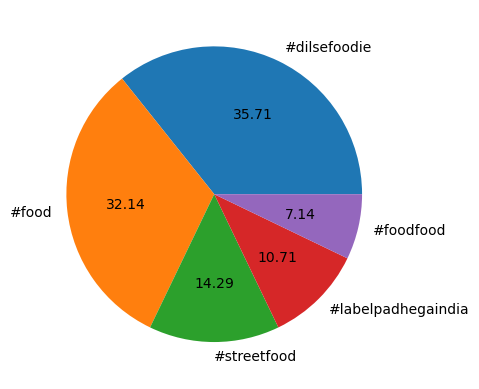

In [113]:
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()

# Probem 3 :
You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

# 2.Calculate the average likes for a handle.

In [ ]:
'''
I have made a function named get_avg_likes to calculate average likes this function will take two argument
1. Total Likes per user
2. Number of Posts
'''
def get_avg_likes(Total_Likes,Number_of_Post):
    avg_likes = Total_Likes / Number_of_Post
    return avg_likes

# calculating avarge likes for 5 handles for 10 posts and store the result in list
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
average_likes_dict={}
for Id,Total_Likes in Total_likes_of_user.items():
    avg_likes = get_avg_likes(Total_Likes,10)
    average_likes_dict[Id]=avg_likes
    print(Id,'---->',format(avg_likes,'.0f'))

# 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [ ]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = {}
for ID in Top_5_handle:
    avg_followers_count = int(Top_5_followed_user[ID]/average_likes_dict[ID])
    avg_followers[ID]=avg_followers_count
    print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))

# 4.Create a bar graph to depict the above obtained information.

In [ ]:
#Plotting Bar Graph for average likes of each handle
#for this I will use answer of problem 3.2 
username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

In [ ]:
# Plotting Bar Graph for average followers:like ratio of each handle

In [ ]:
#For this I will use answer of problem 3.3
username = list(avg_followers.keys())
avg_like = list(avg_followers.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.xticks(rotation = 45)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()

In [ ]:
driver.close()